In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/bank_transactions_data_2.csv")

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [5]:
df.shape

(2512, 16)

In [6]:
pd.DataFrame({
    'count' : df.shape[0],
    'null' : df.isna().sum(),
    'null %' : df.isna().sum()/df.shape[0]*100,
    'cardinality' : df.nunique()

    })

,count,null,null %,cardinality
TransactionID,2512,0,0.0,2512
AccountID,2512,0,0.0,495
TransactionAmount,2512,0,0.0,2455
TransactionDate,2512,0,0.0,2512
TransactionType,2512,0,0.0,2
Location,2512,0,0.0,43
DeviceID,2512,0,0.0,681
IP Address,2512,0,0.0,592
MerchantID,2512,0,0.0,100
Channel,2512,0,0.0,3


In [8]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [10]:
# EDA

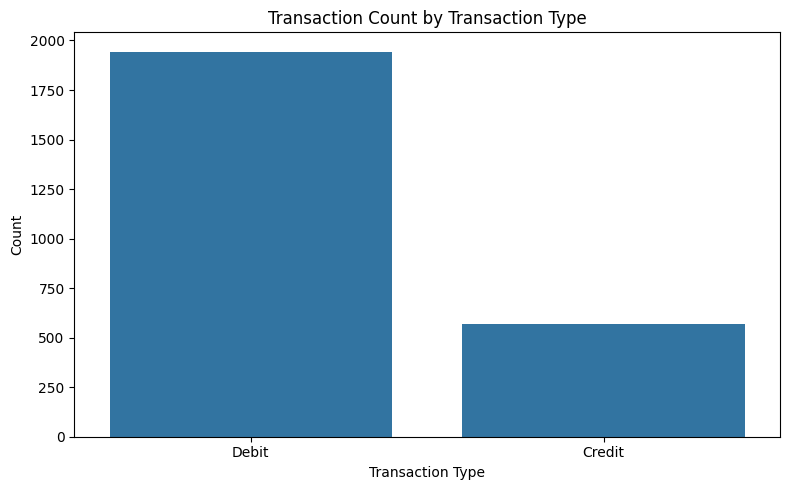

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TransactionType', order=df['TransactionType'].value_counts().index)
plt.title('Transaction Count by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

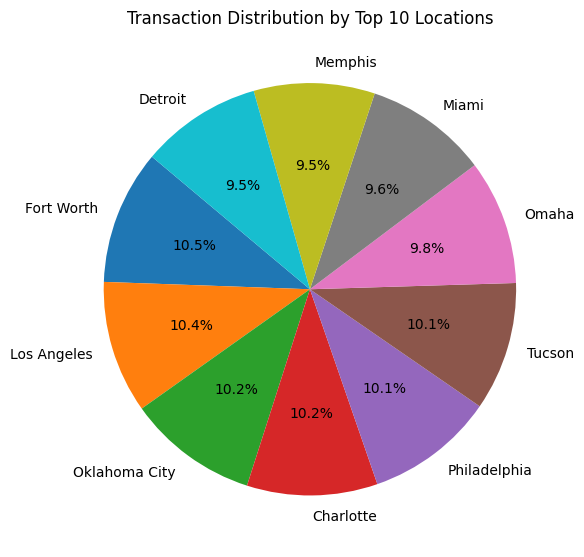

In [16]:
location_counts = df['Location'].value_counts()
top_locations = location_counts.head(10)
plt.figure(figsize=(6, 6))
top_locations.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Transaction Distribution by Top 10 Locations')
plt.ylabel('')
plt.tight_layout()
plt.show()

<ipython-input-19-753dcd5fbe36>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CustomerOccupation', y='TransactionAmount', palette="pastel")


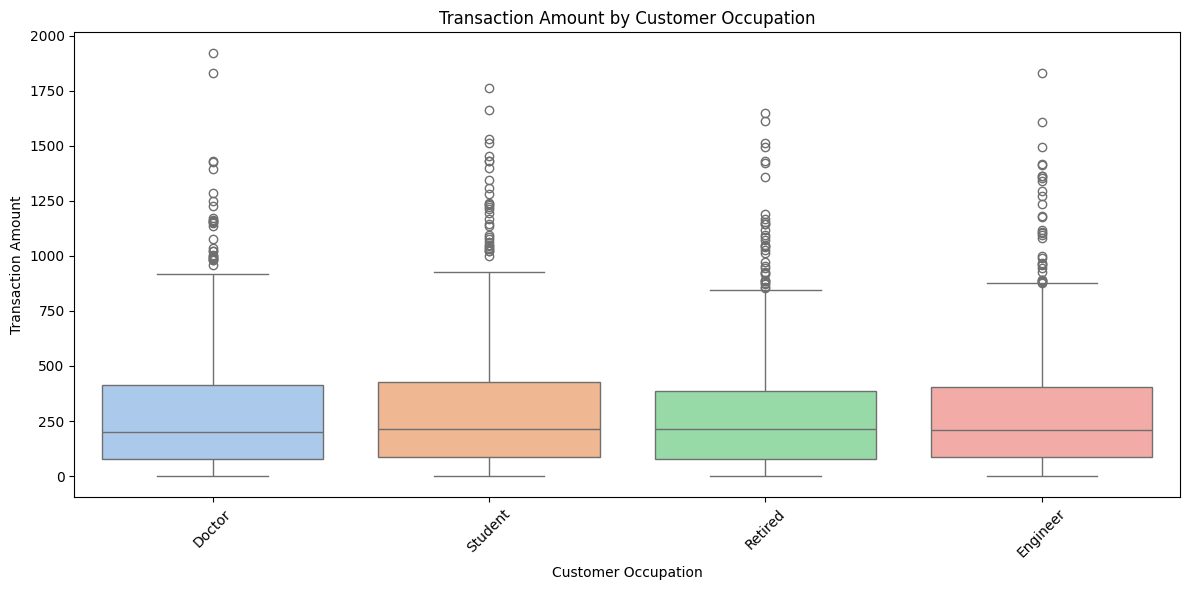

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='CustomerOccupation', y='TransactionAmount', palette="pastel")
plt.title('Transaction Amount by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

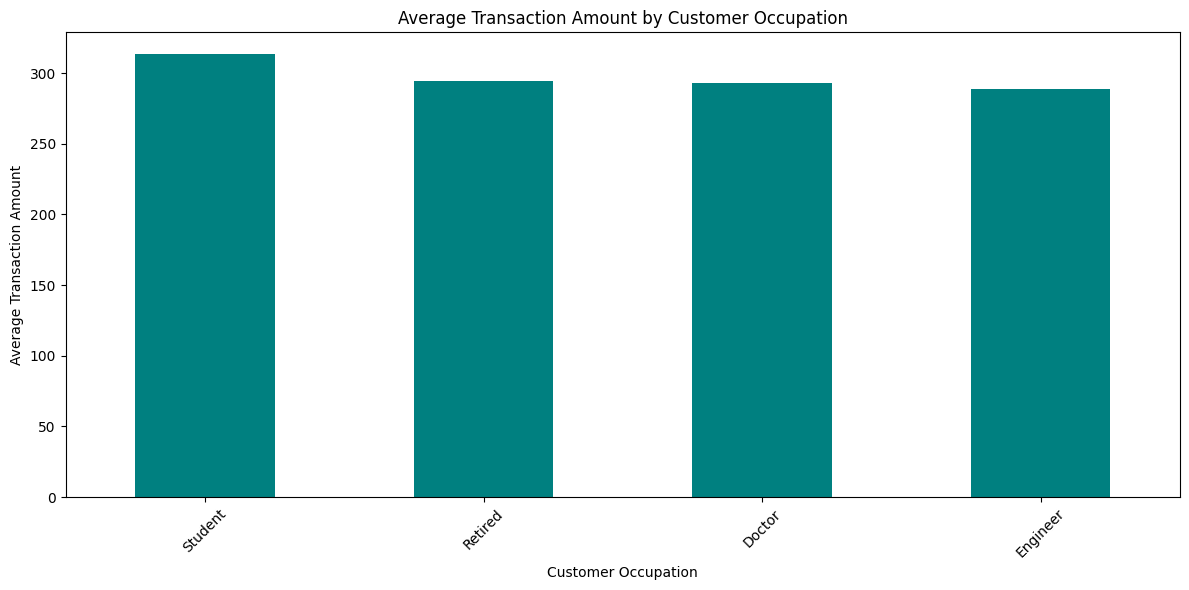

In [25]:
avg_amount = df.groupby('CustomerOccupation')['TransactionAmount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_amount.plot(kind='bar', color = 'teal')
plt.title('Average Transaction Amount by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


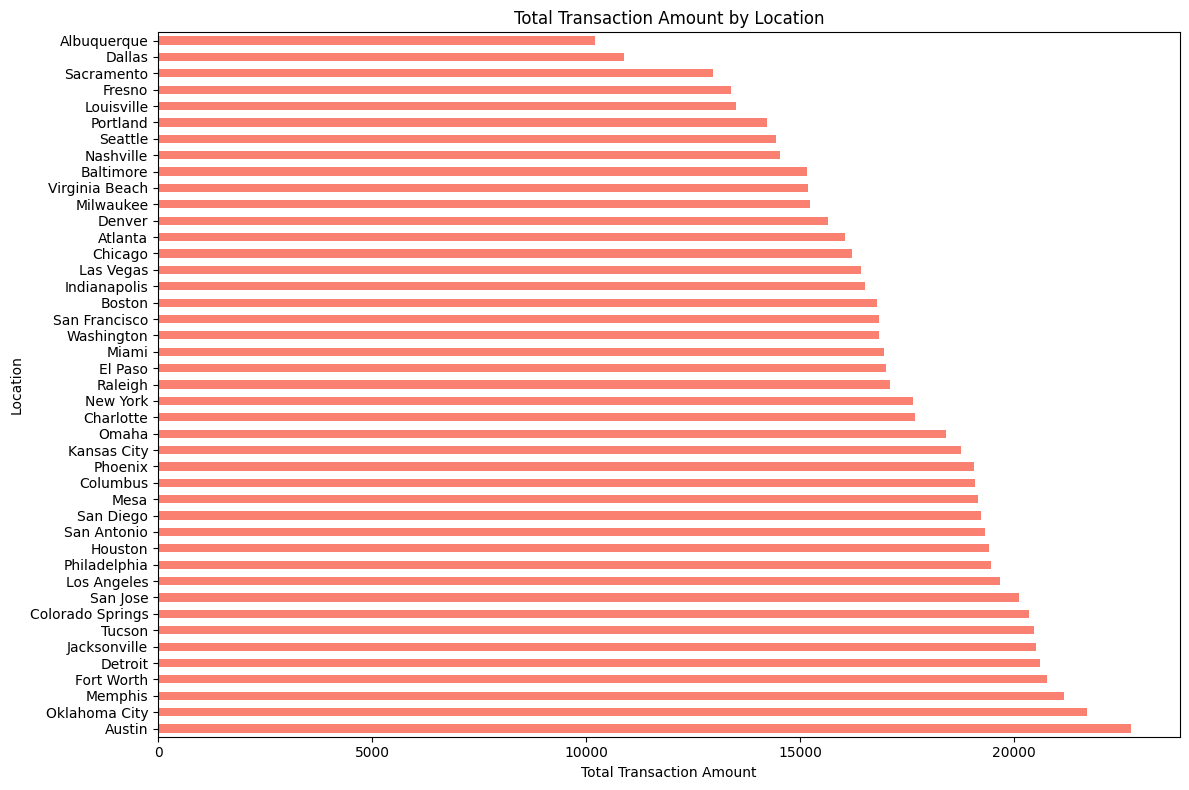

In [32]:
plt.figure(figsize=(12, 8))
location_amount = df.groupby('Location')['TransactionAmount'].sum().sort_values(ascending=False)
location_amount.plot(kind='barh', color='salmon')
plt.title('Total Transaction Amount by Location')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


<ipython-input-34-63fcf725fe3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CustomerOccupation', y='AccountBalance', palette='Set3')


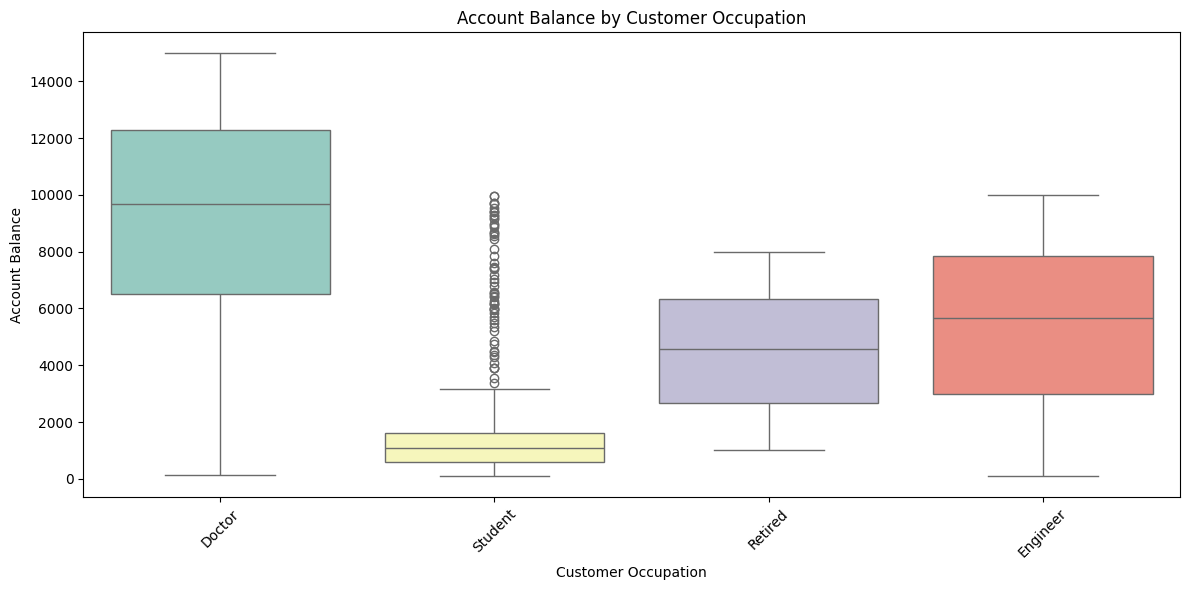

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='CustomerOccupation', y='AccountBalance', palette='Set3')
plt.title('Account Balance by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Account Balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-39-6e7380ace8e0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Channel', y='TransactionAmount', palette='coolwarm')


<Axes: xlabel='Channel', ylabel='TransactionAmount'>

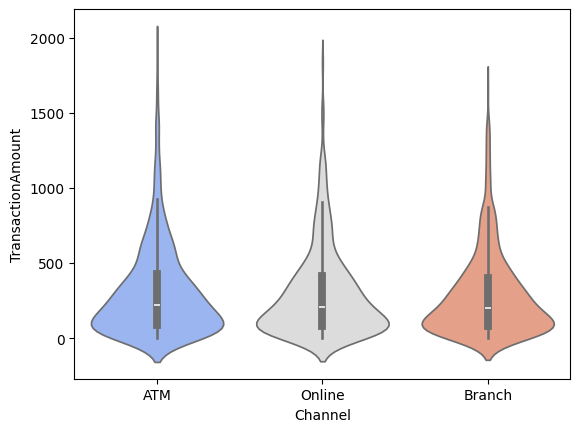

In [39]:
sns.violinplot(data=df, x='Channel', y='TransactionAmount', palette='coolwarm')

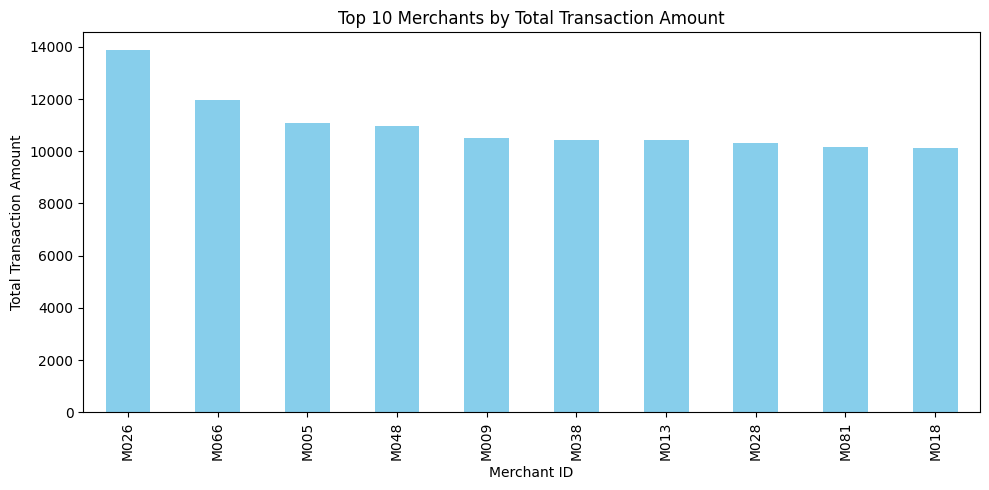

In [40]:
top_merchants = df.groupby('MerchantID')['TransactionAmount'].sum().sort_values(ascending=False).head(10)

top_merchants.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Merchants by Total Transaction Amount')
plt.xlabel('Merchant ID')
plt.ylabel('Total Transaction Amount')
plt.tight_layout()
plt.show()


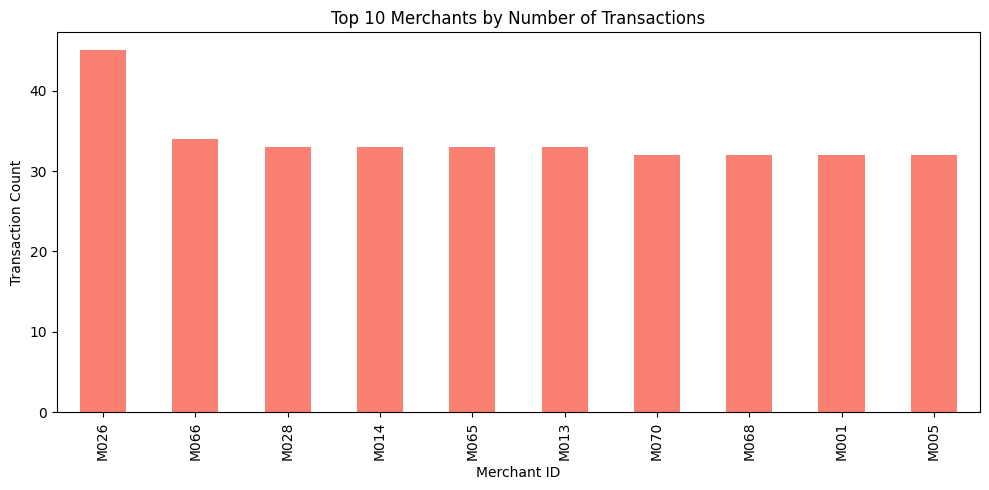

In [41]:
merchant_counts = df['MerchantID'].value_counts().head(10)

merchant_counts.plot(kind='bar', figsize=(10, 5), color='salmon')
plt.title('Top 10 Merchants by Number of Transactions')
plt.xlabel('Merchant ID')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()


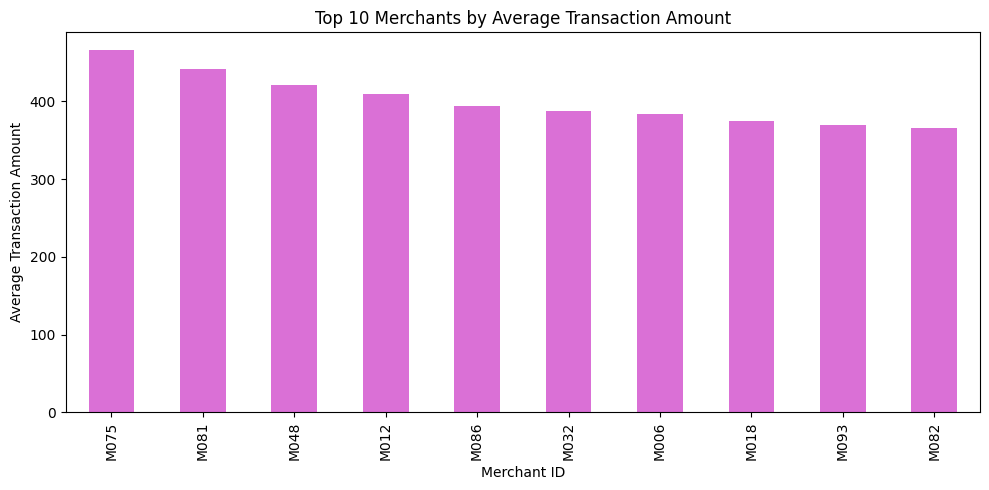

In [42]:
avg_txn = df.groupby('MerchantID')['TransactionAmount'].mean().sort_values(ascending=False).head(10)

avg_txn.plot(kind='bar', figsize=(10, 5), color='orchid')
plt.title('Top 10 Merchants by Average Transaction Amount')
plt.xlabel('Merchant ID')
plt.ylabel('Average Transaction Amount')
plt.tight_layout()
plt.show()


Feature Engineering

In [43]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [49]:
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.day_name()

In [50]:
df.groupby('TransactionDayOfWeek').count()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TransactionMonth,TransactionHour
TransactionDayOfWeek,,,,,,,,,,,,,,,,,,,
Friday,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373
Monday,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070
Thursday,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368
Tuesday,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360
Wednesday,341,341,341,341,341,341,341,341,341,341,341,341,341,341,341,341,341,341,341


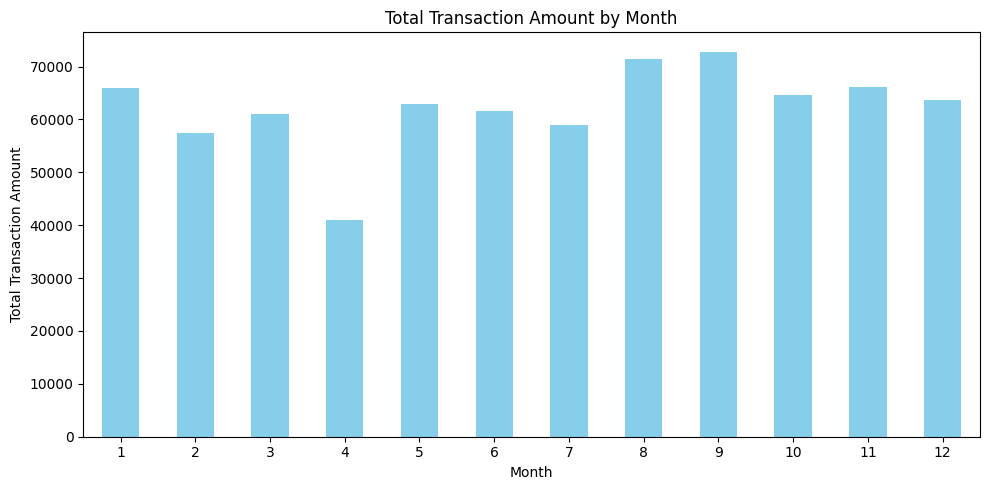

In [51]:
monthly_amount = df.groupby('TransactionMonth')['TransactionAmount'].sum().sort_index()

plt.figure(figsize=(10, 5))
monthly_amount.plot(kind='bar', color='skyblue')
plt.title('Total Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

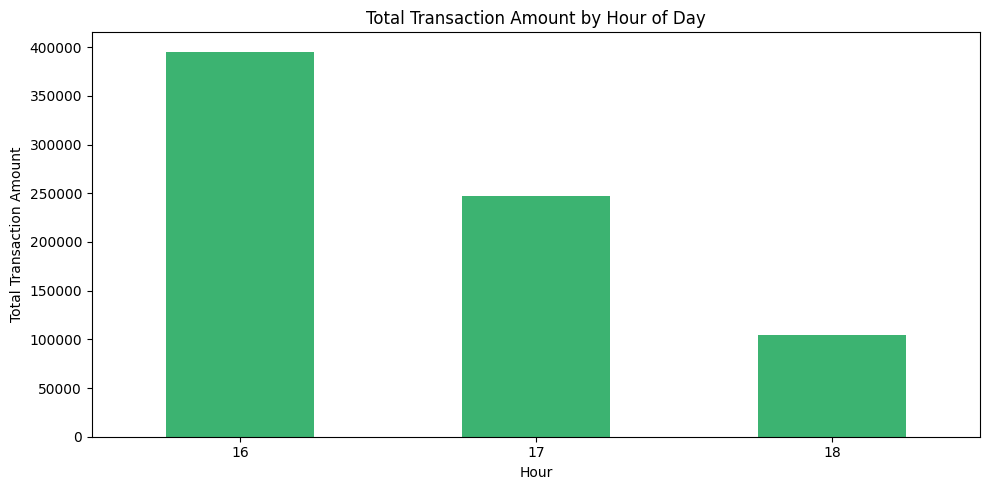

In [53]:
hourly_amount = df.groupby('TransactionHour')['TransactionAmount'].sum()
plt.figure(figsize=(10, 5))
hourly_amount.plot(kind='bar', color='mediumseagreen')
plt.title('Total Transaction Amount by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

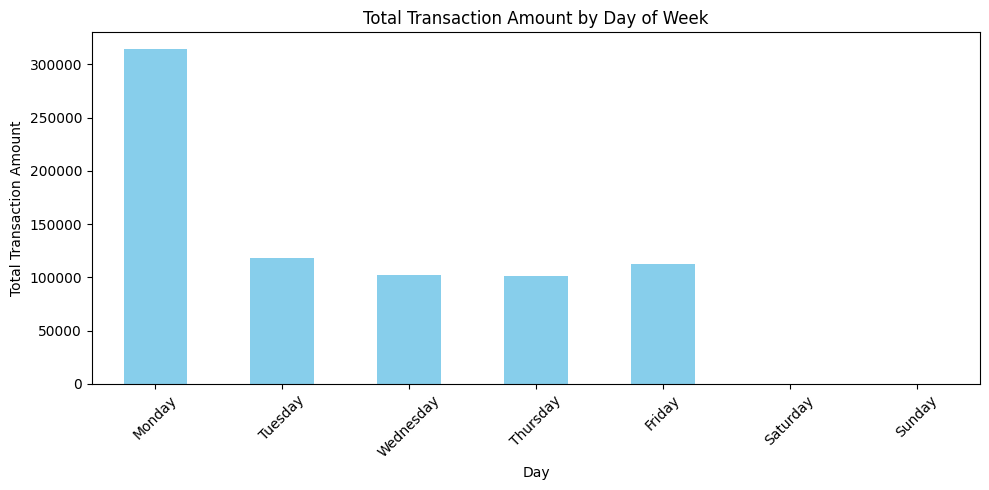

In [61]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_amount = df.groupby('TransactionDayOfWeek')['TransactionAmount'].sum().reindex(weekday_order)

plt.figure(figsize=(10, 5))
weekday_amount.plot(kind='bar', color='skyblue')
plt.title('Total Transaction Amount by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

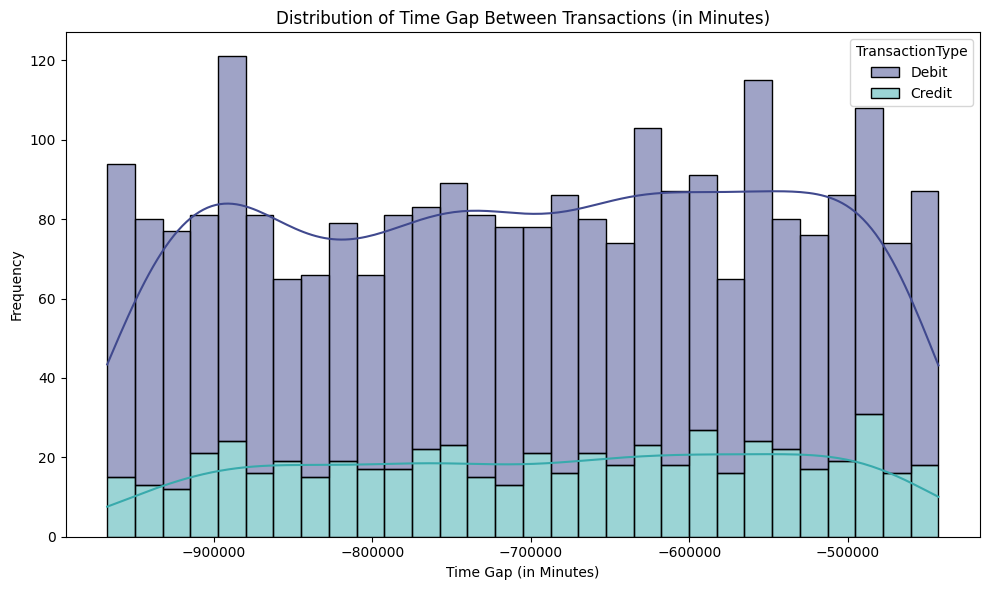

In [63]:
# Convert PreviousTransactionDate to datetime
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Now calculate the time gap (in minutes)
df['TimeGap'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='TimeGap',
    bins=30,
    palette='mako',
    kde=True,
    hue='TransactionType',
    multiple='stack'
)
plt.title('Distribution of Time Gap Between Transactions (in Minutes)')
plt.xlabel('Time Gap (in Minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

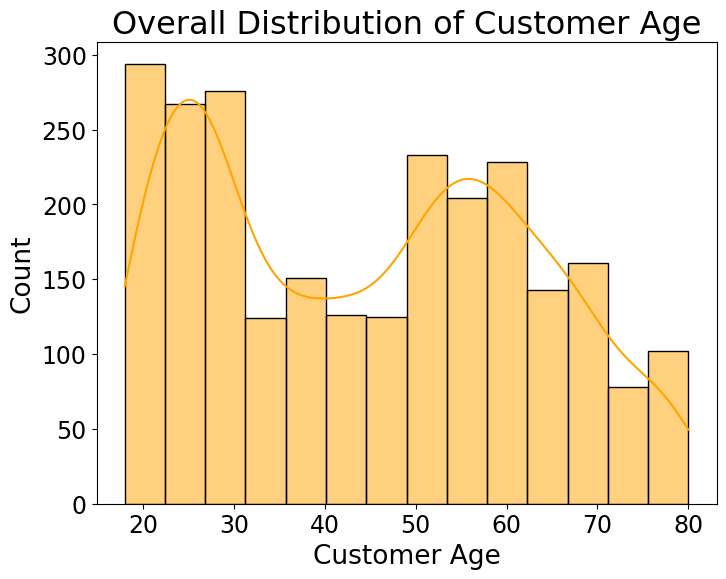

In [65]:
plt.figure(figsize=(8,6))

plt.xlabel('Customer Age', fontsize=19)
plt.ylabel('Count', fontsize=19)

plt.yticks(fontsize=17)
plt.xticks(fontsize=17)

plt.title('Overall Distribution of Customer Age', fontsize=23)

sns.histplot(data = df, x=df['CustomerAge'], kde=True, color='orange')

plt.show()

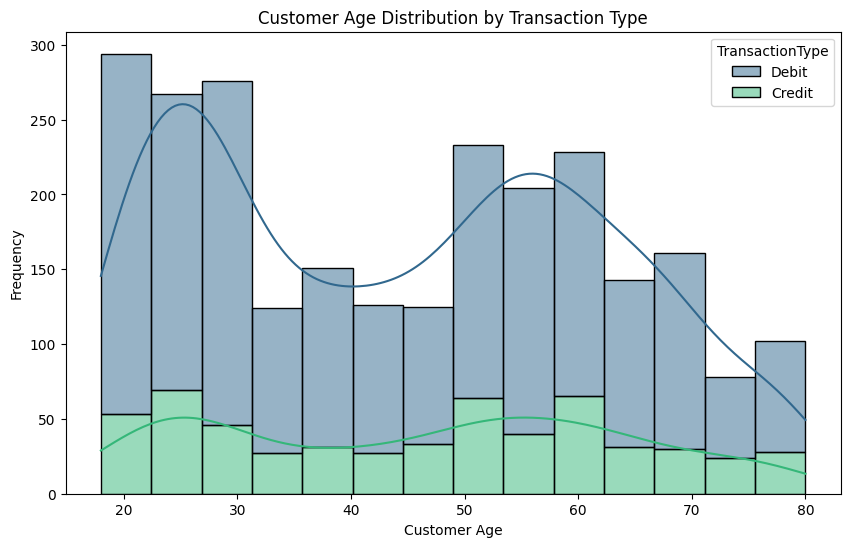

In [66]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='CustomerAge', hue='TransactionType', multiple='stack', palette='viridis', kde=True)
plt.title('Customer Age Distribution by Transaction Type')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-67-f5d741650e26>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='AccountBalance', shade=True, color='navy')


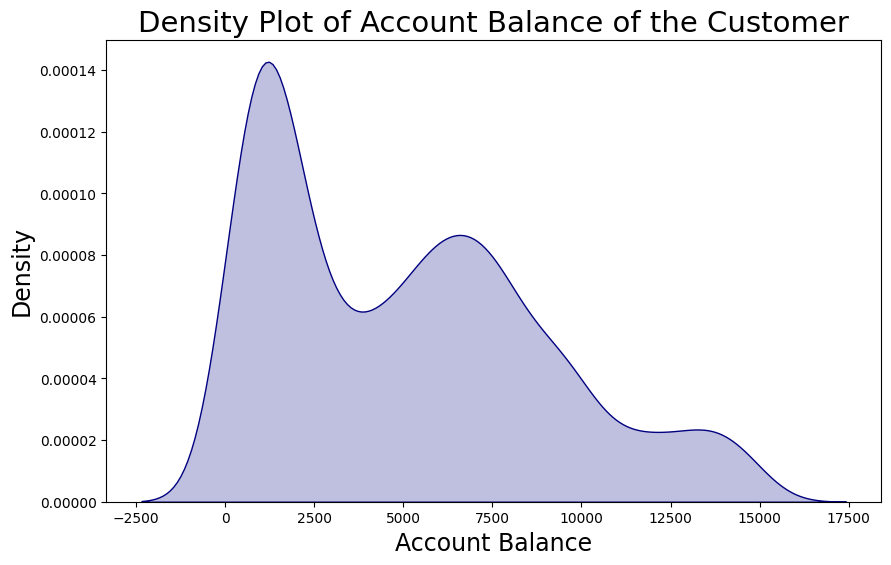

In [67]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='AccountBalance', shade=True, color='navy')

plt.xlabel('Account Balance', fontsize=17)
plt.ylabel('Density', fontsize=17)

plt.title('Density Plot of Account Balance of the Customer', fontsize=21)

plt.show()

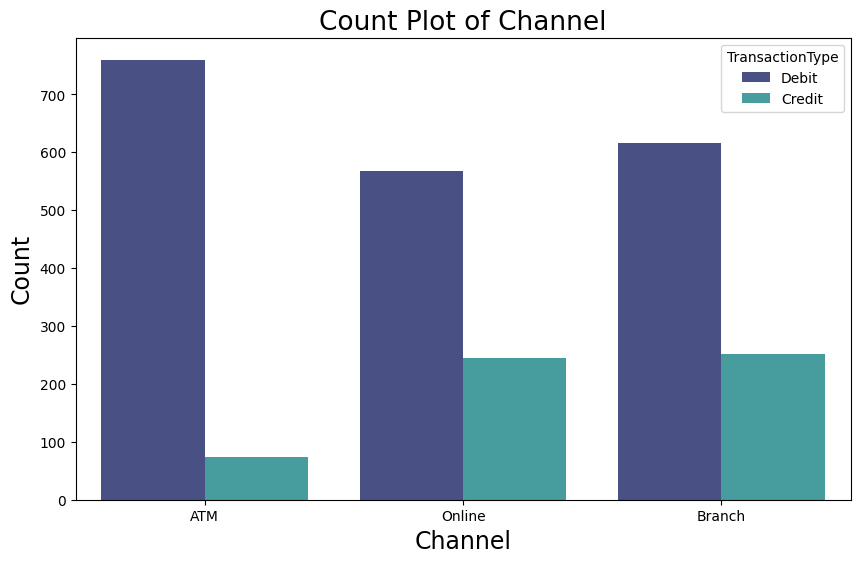

In [68]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='Channel', hue='TransactionType', palette='mako')

plt.xlabel('Channel', fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.title('Count Plot of Channel', fontsize=19)

plt.show()

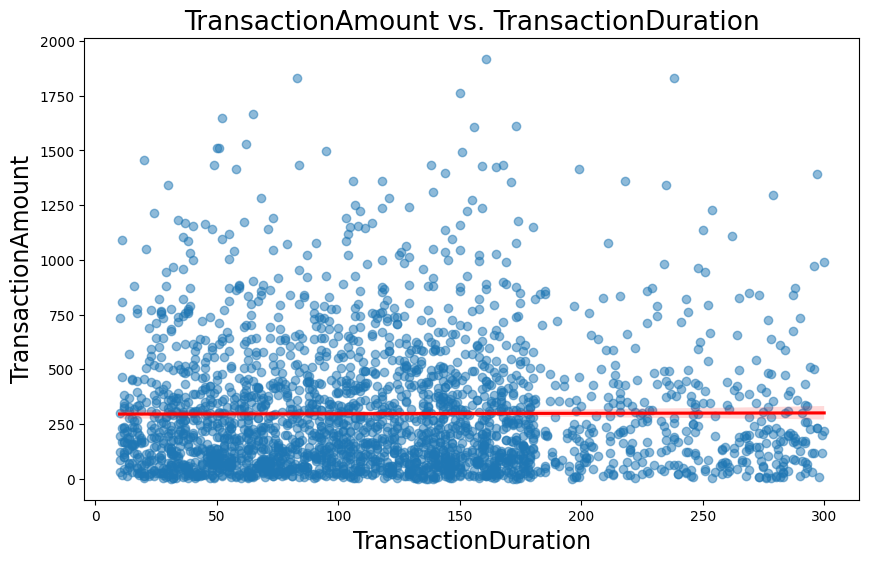

In [69]:
plt.figure(figsize=(10,6))
sns.regplot(x='TransactionDuration', y='TransactionAmount', data=df, scatter_kws={'alpha':0.5}, line_kws = {'color':'red'})
plt.title('TransactionAmount vs. TransactionDuration', fontsize=19)
plt.xlabel('TransactionDuration', fontsize=17)
plt.ylabel('TransactionAmount', fontsize=17)
plt.show()

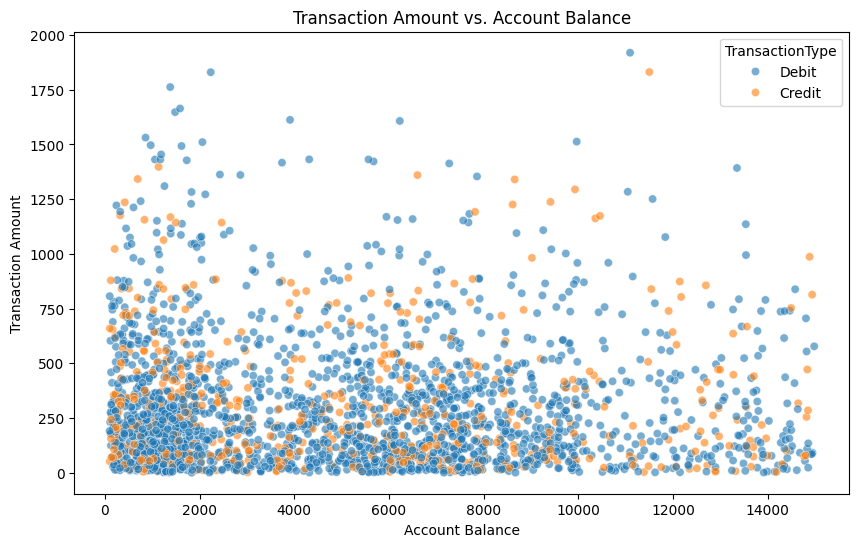

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='AccountBalance', y='TransactionAmount', hue='TransactionType', alpha=0.6)
plt.title('Transaction Amount vs. Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.legend(title = 'TransactionType')
plt.show()

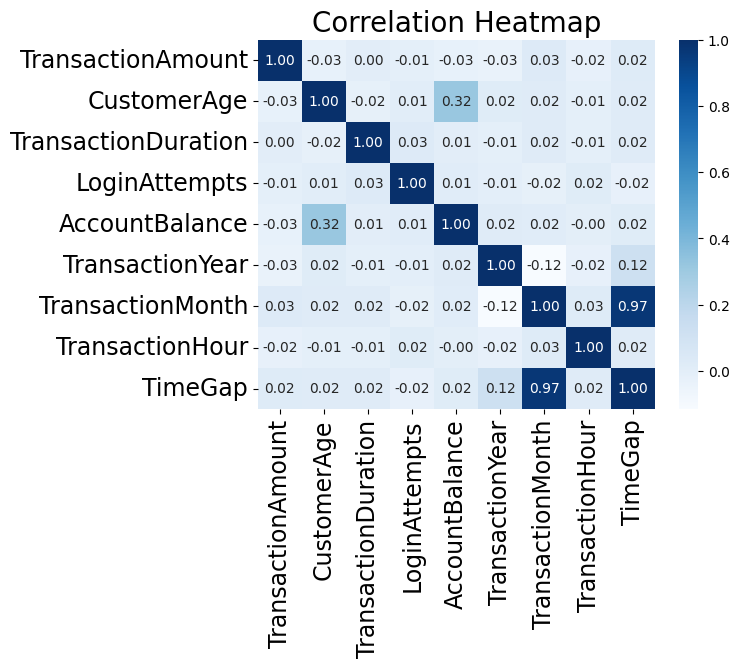

In [71]:
numeric_columns = df.select_dtypes(include=np.number).columns

correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(rotation=90, fontsize=17)
plt.yticks(fontsize=17)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

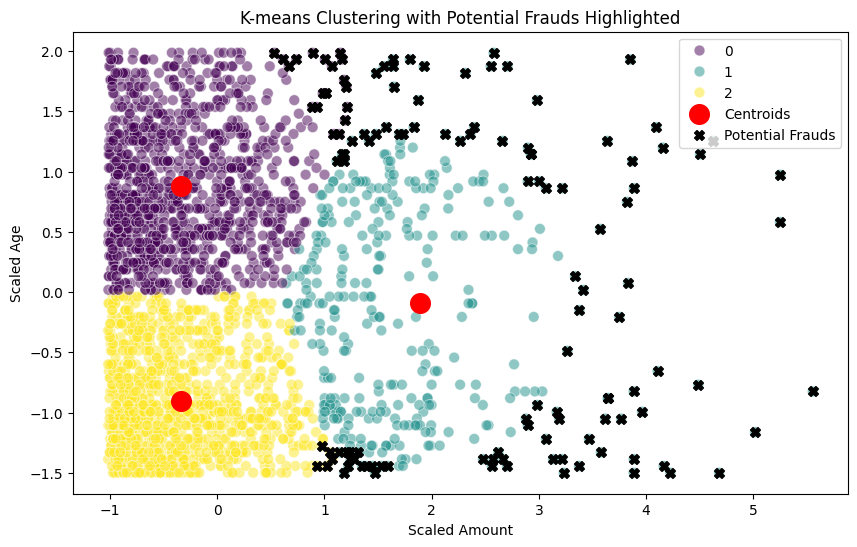

Number of potential frauds detected: 126


In [74]:
X = df[['TransactionAmount', 'CustomerAge']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)
# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)

# Flag points above the threshold as potential frauds
df['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = df[df['Potential_Fraud']]
non_frauds = df[~df['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1],
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

print(f"Number of potential frauds detected: {len(frauds)}")

In [77]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.47


DBSCAN_Cluster
 0    2469
-1      31
 1       7
 2       5
Name: count, dtype: int64


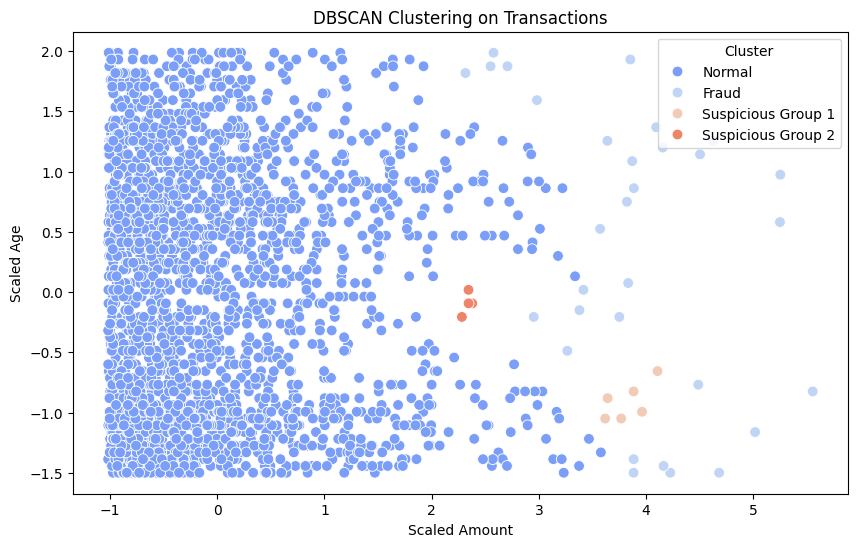

In [85]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted DBSCAN clustering with a refined eps value
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps based on k-distance elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
df['DBSCAN_Cluster'] = dbscan_labels
print(df['DBSCAN_Cluster'].value_counts())
# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

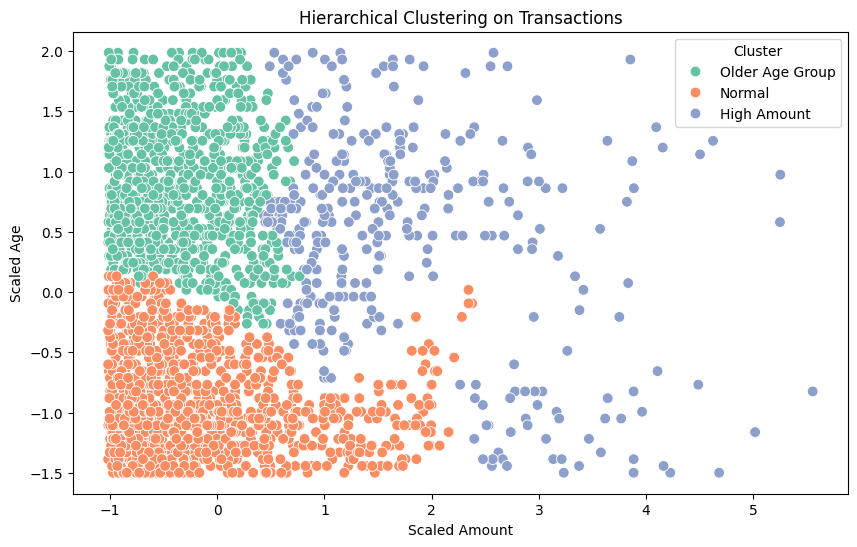

In [79]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add labels to the dataset
df['Hierarchical_Cluster'] = hierarchical_labels

# Mapping the cluster labels to descriptive names
cluster_mapping = {0: 'Normal', 1: 'High Amount', 2: 'Older Age Group'}
df['Hierarchical_Cluster'] = df['Hierarchical_Cluster'].map(cluster_mapping)

# Plot with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Hierarchical_Cluster'], palette='Set2', s=60)
plt.title('Hierarchical Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

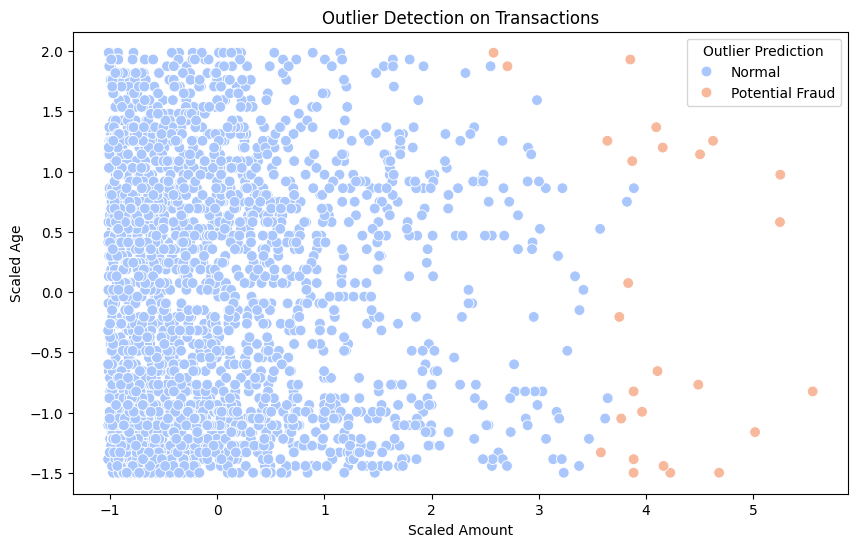

In [80]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to identify anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Set contamination rate to expected fraud rate
outlier_pred = iso_forest.fit_predict(X_scaled)

# Map the results (-1 for outliers, 1 for normal) to descriptive labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
df['Outlier_Prediction'] = pd.Series(outlier_pred).map(outlier_mapping)

# Plotting with isolation forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Outlier_Prediction'], palette='coolwarm', s=60)
plt.title('Outlier Detection on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Outlier Prediction')
plt.show()